# Data Vis Project

### The aim of this project is to put into practice the data science skills you have acquired during the course. Using real estate data files available on the data.gouv.fr platform, we will create a useful solution for a real estate investor. 

First of all we imported all the libraries we needed for this notebook

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then we imported the dataset .csv from the website data.gouv.fr 

In [65]:
# URL du fichier compressé
url = "https://files.data.gouv.fr/geo-dvf/latest/csv/2024/full.csv.gz"

try:
    data = pd.read_csv(url, compression='gzip')
    print("File Loaded")
    print(f"Nombre de lignes: {data.shape[0]}, Nombre de colonnes: {data.shape[1]}")
    display(data.head(20))
except FileNotFoundError:
    print("Error : File not found, url incorrect")
except pd.errors.EmptyDataError:
    print("Error : The file is empty")
except pd.errors.ParserError:
    print("Error : Wrong format")

C:\Users\solix\AppData\Local\Temp\ipykernel_29516\3293013924.py:5: DtypeWarning: Columns (8,10,12,14,17,18,20,22,24,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, compression='gzip')


File Loaded
Nombre de lignes: 1566643, Nombre de colonnes: 40


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,NaN,NaN,LE DELIVRE,B020,1230.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,NaN,PIN HAMEAU,B086,1290.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
5,2024-4,2024-01-03,1,Vente,329500.0,9001.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
6,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Appartement,89.0,4.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
7,2024-5,2024-01-09,1,Vente,20000.0,NaN,NaN,AU CHAUME,B579,1110.0,...,NaN,NaN,NaN,BR,futaies résineuses,NaN,NaN,1584.0,5.548635,45.900606
8,2024-5,2024-01-09,1,Vente,20000.0,NaN,NaN,LES FATES,B606,1110.0,...,NaN,NaN,NaN,BR,futaies résineuses,NaN,NaN,188.0,5.555398,45.899514
9,2024-5,2024-01-09,1,Vente,20000.0,NaN,NaN,LES FATES,B606,1110.0,...,NaN,NaN,NaN,BR,futaies résineuses,NaN,NaN,2532.0,5.554337,45.899235


Now, for further analysis, we need to clean, delete duplicates and convert all the data with different methods

In [67]:
data = data.dropna(thresh=len(data.columns) * 0.5)
print("Nombre de lignes après suppression des lignes avec plus de 50% de valeurs manquantes:", data.shape[0])

# Remplir les valeurs manquantes spécifiques
# Remplir 'valeur_fonciere' avec la médiane
if 'valeur_fonciere' in data.columns:
    data['valeur_fonciere'] = data['valeur_fonciere'].fillna(data['valeur_fonciere'].median())

# Remplir 'type_local' avec "Inconnu" pour indiquer un type non spécifié
if 'type_local' in data.columns:
    data['type_local'] = data['type_local'].fillna("Inconnu")

# Remplir 'surface_reelle_bati' et 'surface_terrain' par 0, pour indiquer l'absence de surface
if 'surface_reelle_bati' in data.columns:
    data['surface_reelle_bati'] = data['surface_reelle_bati'].fillna(0)

if 'surface_terrain' in data.columns:
    data['surface_terrain'] = data['surface_terrain'].fillna(0)

# 2. Conversion des types de données

# Convertir 'date_mutation' en format datetime
if 'date_mutation' in data.columns:
    data['date_mutation'] = pd.to_datetime(data['date_mutation'], errors='coerce')

# Convertir les colonnes numériques
numeric_columns = ['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# 3. Suppression des doublons
# Suppression des lignes dupliquées
data = data.drop_duplicates()
print("Nombre de lignes après suppression des doublons:", data.shape[0])

# 4. Normalisation des chaînes de caractères

# Transformer 'nom_commune' en majuscules
if 'nom_commune' in data.columns:
    data['nom_commune'] = data['nom_commune'].str.upper()

# Supprimer les espaces en trop dans 'type_local'
if 'type_local' in data.columns:
    data['type_local'] = data['type_local'].str.strip()

# Affichage des informations finales sur les données pour vérification
print("Résumé des données nettoyées :")
print(data.info())
print("Statistiques descriptives :")
print(data.describe())

# Afficher les premières lignes pour une inspection visuelle
display(data.head())

Nombre de lignes après suppression des lignes avec plus de 50% de valeurs manquantes: 935111
Nombre de lignes après suppression des doublons: 828257
Résumé des données nettoyées :
<class 'pandas.core.frame.DataFrame'>
Index: 828257 entries, 3 to 1566642
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   id_mutation                   828257 non-null  object        
 1   date_mutation                 828257 non-null  datetime64[ns]
 2   numero_disposition            828257 non-null  int64         
 3   nature_mutation               828257 non-null  object        
 4   valeur_fonciere               828257 non-null  float64       
 5   adresse_numero                771004 non-null  float64       
 6   adresse_suffixe               57736 non-null   object        
 7   adresse_nom_voie              828252 non-null  object        
 8   adresse_code_voie             828257 n

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6.058695,46.332212
5,2024-4,2024-01-03,1,Vente,329500.0,9001.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,0.0,0.0,NaN,NaN,NaN,NaN,0.0,6.058695,46.332212
6,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Appartement,89.0,4.0,NaN,NaN,NaN,NaN,0.0,6.058695,46.332212
77,2024-7,2024-01-03,1,Vente,94500.0,32.0,NaN,RUE DES PETITES FONTAINES,0325,1150.0,...,Dépendance,0.0,0.0,S,sols,NaN,NaN,65.0,5.348768,45.904292
78,2024-7,2024-01-03,1,Vente,94500.0,32.0,NaN,RUE DES PETITES FONTAINES,0325,1150.0,...,Appartement,32.0,2.0,S,sols,NaN,NaN,65.0,5.348768,45.904292


This part is concecatred to the exploration of the dataset, understand general trends and identify correlations of interest to real estate investors.

In [84]:
print("Descriptive statistics :")
print(data[['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']].describe())

Descriptive statistics :
       valeur_fonciere  surface_reelle_bati  surface_terrain  \
count     8.282570e+05        828257.000000     8.282570e+05   
mean      3.971152e+05            66.375007     8.049216e+02   
std       2.456096e+06           666.504818     8.378200e+03   
min       1.500000e-01             0.000000     0.000000e+00   
25%       9.700000e+04             0.000000     0.000000e+00   
50%       1.750000e+05            30.000000     6.500000e+01   
75%       3.000000e+05            80.000000     5.570000e+02   
max       2.550000e+08        265000.000000     2.960000e+06   

       nombre_pieces_principales  
count               767523.00000  
mean                     1.87700  
std                      2.08108  
min                      0.00000  
25%                      0.00000  
50%                      1.00000  
75%                      4.00000  
max                     70.00000  


In [90]:
price_by_region = data.groupby('nom_commune')['valeur_fonciere'].mean().sort_values(ascending=False)
surface_by_region = data.groupby('nom_commune')['surface_reelle_bati'].mean().sort_values(ascending=False)

print("Average price by region :")
print(price_by_region.head(10))
print("Average Surface by region :")
print(surface_by_region.head(10))

Average price by region :
nom_commune
VILLEFONTAINE               4.713464e+07
LA VERPILLIÈRE              2.486706e+07
PAUILLAC                    1.315915e+07
RAMATUELLE                  1.154006e+07
POMEROL                     1.033849e+07
CHAMBOLLE-MUSIGNY           9.619000e+06
PARIS 8E ARRONDISSEMENT     8.733039e+06
BOUXIÈRES-SOUS-FROIDMONT    8.647364e+06
SERRUELLES                  7.722008e+06
NEUILLY-SUR-SEINE           7.622421e+06
Name: valeur_fonciere, dtype: float64
Average Surface by region :
nom_commune
ORS                     20035.214286
MOUSTAJON               14837.000000
LUXÉMONT-ET-VILLOTTE    12490.142857
CHÂTENOY                12215.000000
LOYETTES                 9876.370370
BOURDON                  9260.000000
SAINT-PÉREUSE            8617.714286
ESPIRA-DE-CONFLENT       8192.333333
PERPEZAT                 8182.500000
BRESSEY-SUR-TILLE        7515.250000
Name: surface_reelle_bati, dtype: float64


In [92]:
# Extraire l'année de la colonne 'date_mutation'
data['year'] = data['date_mutation'].dt.year

# Calcul du prix moyen par année
price_by_year = data.groupby('year')['valeur_fonciere'].mean()
print("Average price by year :")
print(price_by_year)

Average price by year :
year
2024    397115.207838
Name: valeur_fonciere, dtype: float64


In [94]:
property_type_counts = data['type_local'].value_counts()
print("Types of propriety :")
print(property_type_counts)

Types of propriety :
type_local
Dépendance                                  303086
Maison                                      233434
Appartement                                 185180
Inconnu                                      59851
Local industriel. commercial ou assimilé     46706
Name: count, dtype: int64


In [96]:
correlation_matrix = data[['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']].corr()
print("Correlation Matrix :")
print(correlation_matrix)

Correlation Matrix :
                           valeur_fonciere  surface_reelle_bati  \
valeur_fonciere                   1.000000             0.055147   
surface_reelle_bati               0.055147             1.000000   
surface_terrain                   0.072328             0.087905   
nombre_pieces_principales         0.004611             0.035286   

                           surface_terrain  nombre_pieces_principales  
valeur_fonciere                   0.072328                   0.004611  
surface_reelle_bati               0.087905                   0.035286  
surface_terrain                   1.000000                   0.017824  
nombre_pieces_principales         0.017824                   1.000000  


The correlation matrix allows you to identify linear relationships between variables, which can be useful for predicting the price of goods based on their characteristics.

Now we'll create visualisation to put some graphics on those data

# BEAUCOUP DE GRAPHE, SELECTIONNER LES PLUS UTILES

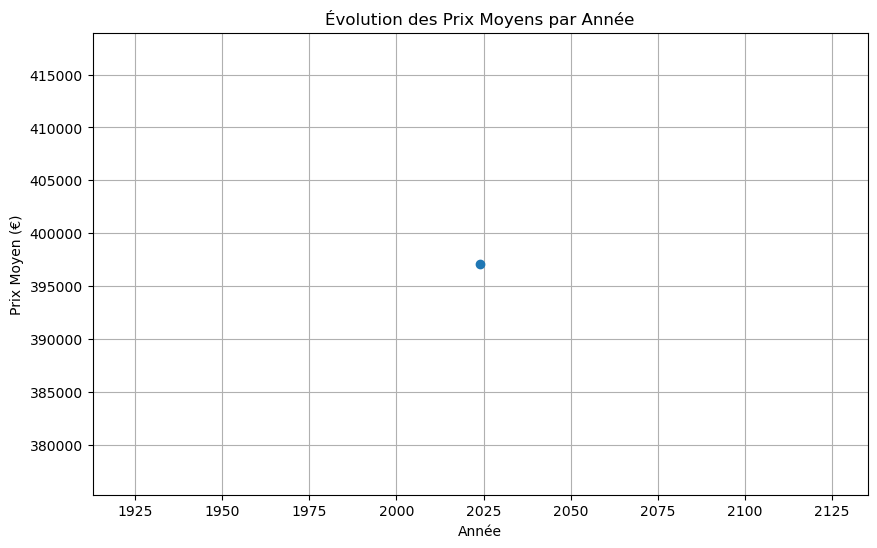

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o')
plt.title("Évolution des Prix Moyens par Année")
plt.xlabel("Année")
plt.ylabel("Prix Moyen (€)")
plt.grid(True)
plt.show()

#A MODIFIER OU SUPPRIMER CAR CELA N'ARRFICHE QUE SUR LES PRIX SUR 1 AN EN 2024

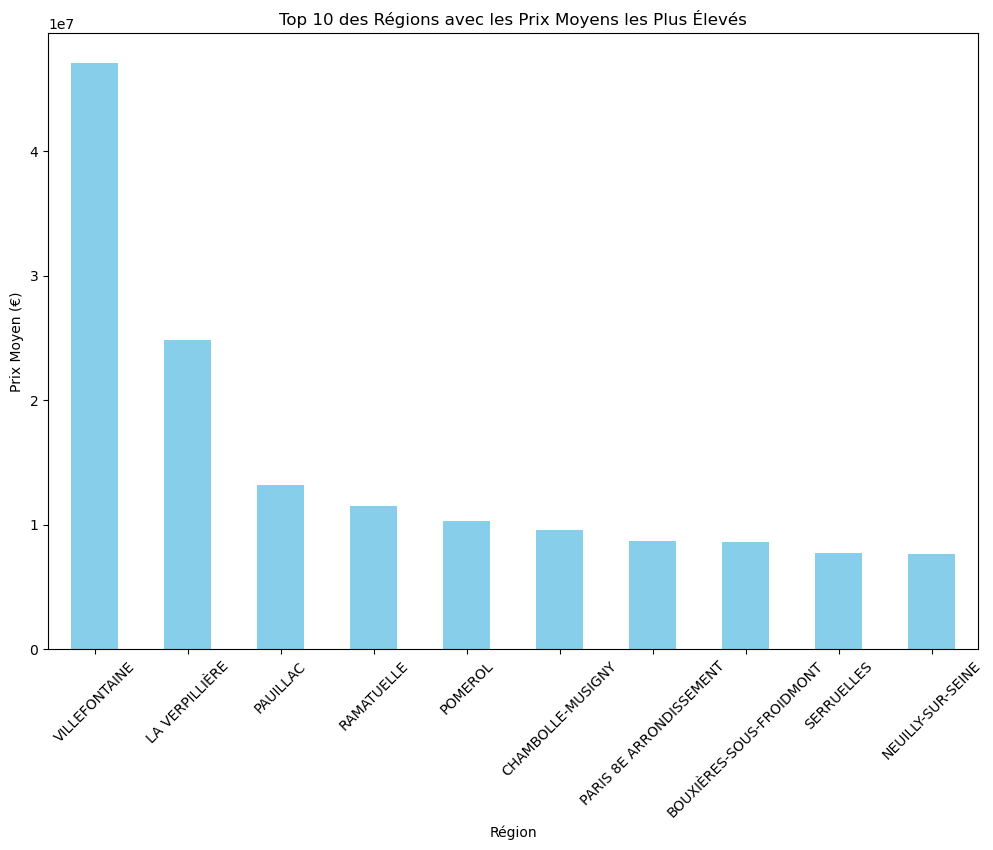

In [100]:
plt.figure(figsize=(12, 8))
price_by_region.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 des Régions avec les Prix Moyens les Plus Élevés")
plt.xlabel("Région")
plt.ylabel("Prix Moyen (€)")
plt.xticks(rotation=45)
plt.show()

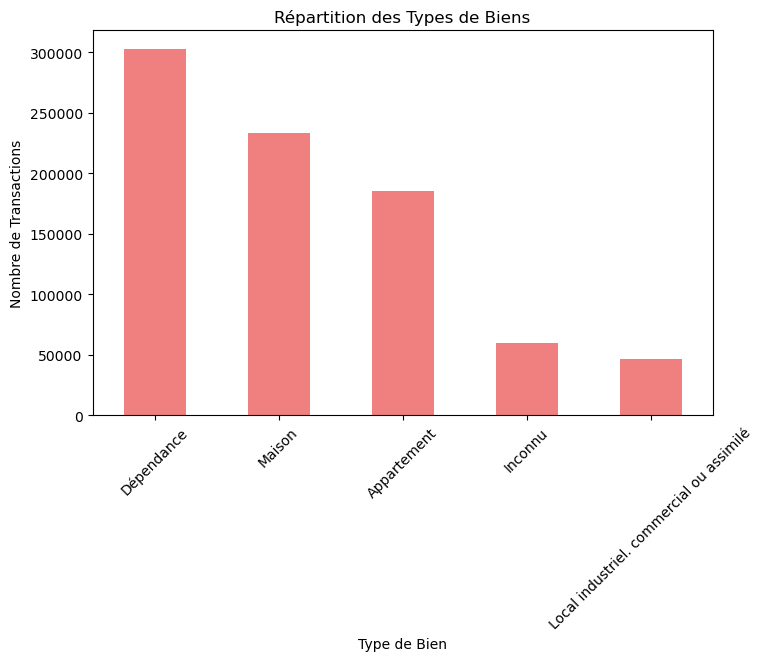

In [120]:
plt.figure(figsize=(8, 5))
property_type_counts.plot(kind='bar', color='lightcoral')
plt.title("Répartition des Types de Biens")
plt.xlabel("Type de Bien")
plt.ylabel("Nombre de Transactions")
plt.xticks(rotation=45)
plt.show()

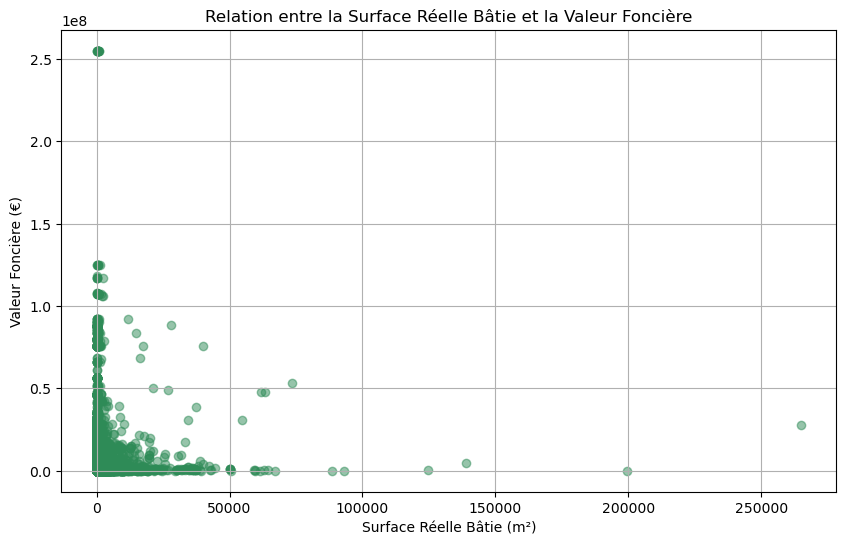

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(data['surface_reelle_bati'], data['valeur_fonciere'], alpha=0.5, color='seagreen')
plt.title("Relation entre la Surface Réelle Bâtie et la Valeur Foncière")
plt.xlabel("Surface Réelle Bâtie (m²)")
plt.ylabel("Valeur Foncière (€)")
plt.grid(True)
plt.show()

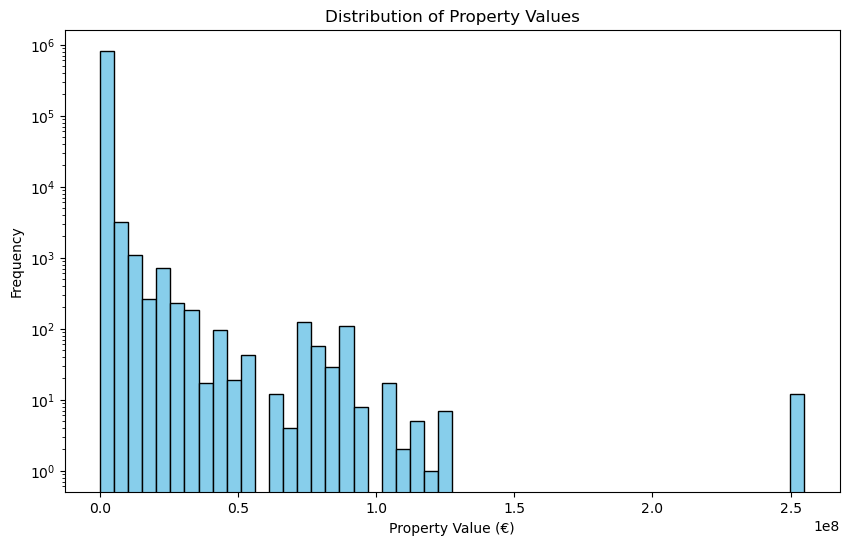

In [122]:
plt.figure(figsize=(10, 6))
plt.hist(data['valeur_fonciere'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Property Values")
plt.xlabel("Property Value (€)")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

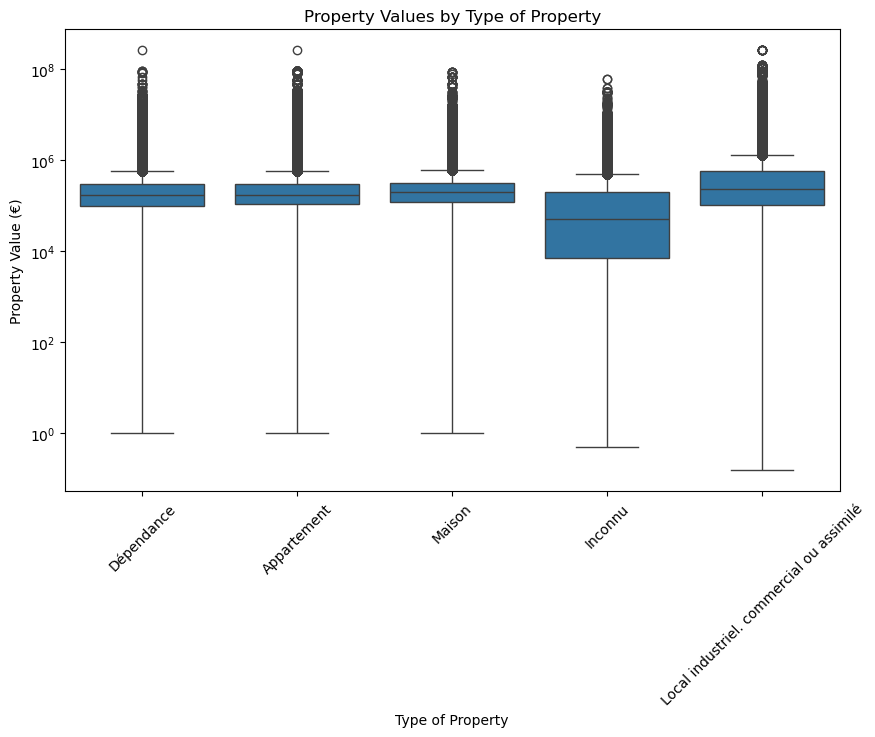

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_local', y='valeur_fonciere', data=data)
plt.title("Property Values by Type of Property")
plt.xlabel("Type of Property")
plt.ylabel("Property Value (€)")
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

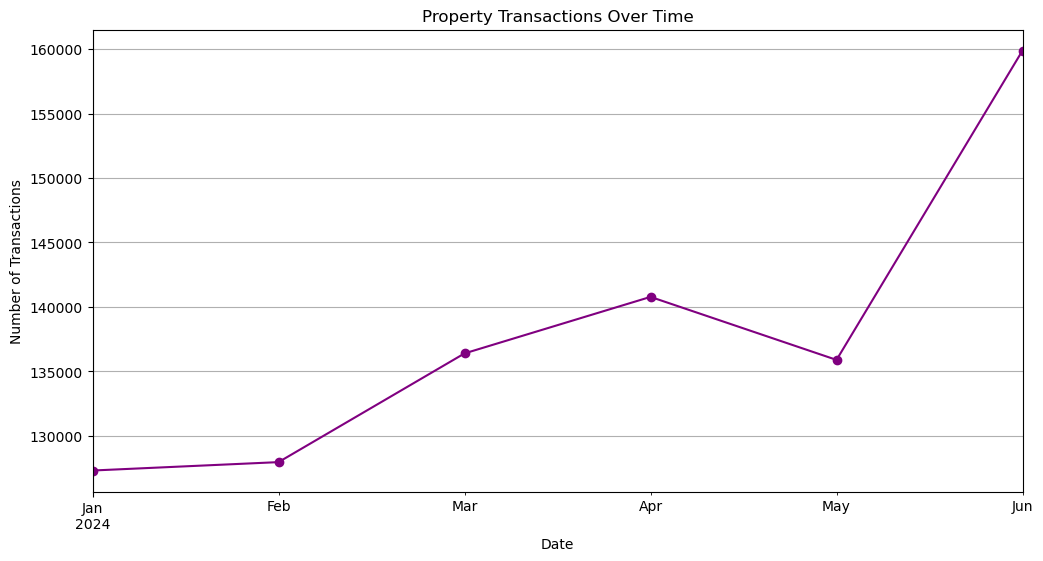

In [130]:
data['date_mutation'] = pd.to_datetime(data['date_mutation'], errors='coerce')

monthly_transactions = data['date_mutation'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='purple')
plt.title("Property Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

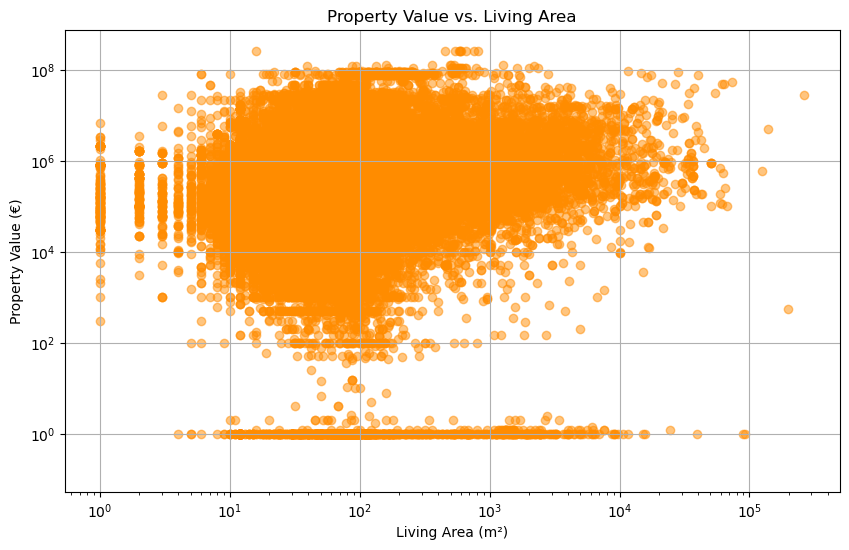

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(data['surface_reelle_bati'], data['valeur_fonciere'], alpha=0.5, color='darkorange')
plt.title("Property Value vs. Living Area")
plt.xlabel("Living Area (m²)")
plt.ylabel("Property Value (€)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

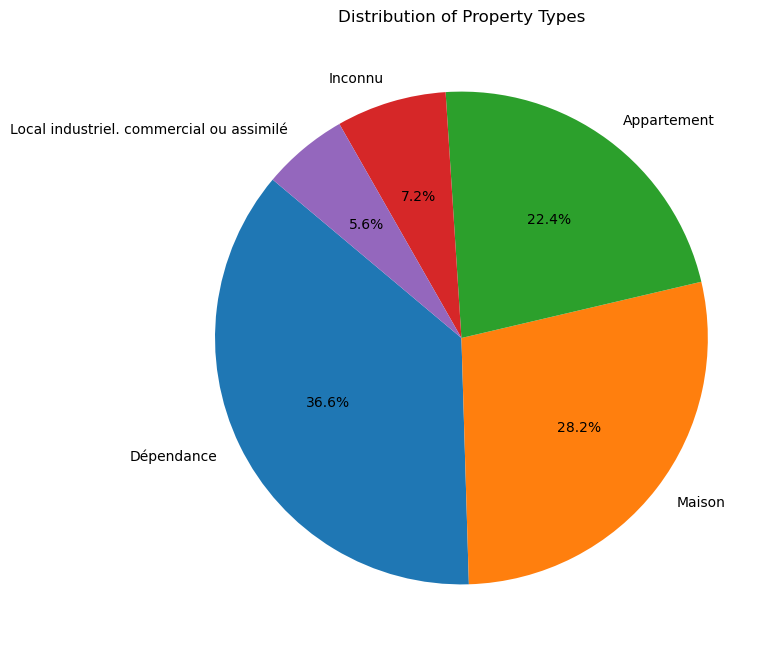

In [136]:
property_type_counts = data['type_local'].value_counts()

plt.figure(figsize=(8, 8))
property_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Property Types")
plt.ylabel("")
plt.show()

# Recommandations

In [141]:
threshold_price = 200000  # Exemple de prix plafond pour une région abordable, à ajuster selon les critères

potential_investment_areas = data.groupby('code_departement')['valeur_fonciere'].mean()

affordable_regions = potential_investment_areas[potential_investment_areas < threshold_price]

print("Départements à fort potentiel d'investissement :")
print(affordable_regions)

Départements à fort potentiel d'investissement :
code_departement
3     130653.717014
4     199362.955987
5     188761.462198
7     186687.018289
8     125095.095432
9     162743.475818
10    169874.495557
11    178139.601789
12    146261.970048
15    126050.310313
16    161196.176453
18    132757.525616
19    145774.237297
23     98862.855032
36    162891.646541
39    157182.458911
42    175572.868096
43    118110.407928
46    182866.991387
48    134451.425421
50    190606.823956
52     99102.943109
53    158414.513601
54    197961.897755
55    171702.517155
58    118178.469864
61    158323.527195
62    196940.243231
63    180098.386021
65    140313.260373
66    189470.248984
70    117417.657826
72    169877.808792
79    150193.414757
81    187252.149697
86    193600.662430
87    150141.240067
88    139936.028840
89    159740.261093
2B    182877.143198
Name: valeur_fonciere, dtype: float64


# CREER DES WIDGETS SUR JUPYTER

In [161]:
!pip install ipywidgets

!pip install jupyterlab-widgets

In [165]:
from ipywidgets import interact, widgets

# Sample data structure; replace with actual data
data = pd.DataFrame({
    'code_departement': [1, 1, 2, 2, 3, 3],
    'valeur_fonciere': [100000, 150000, 200000, 250000, 180000, 170000],
    'type_local': ['Maison', 'Appartement', 'Maison', 'Appartement', 'Maison', 'Appartement'],
    'surface_reelle_bati': [100, 80, 120, 90, 110, 85]
})

# Function to display data by department
def display_data_by_dept(dept):
    dept_data = data[data['code_departement'] == dept]
    print(f"Informations pour le département {dept}")
    display(dept_data[['type_local', 'valeur_fonciere', 'surface_reelle_bati']].describe())

# Create the widget
dept_widget = widgets.Dropdown(
    options=data['code_departement'].unique(),
    description='Département:',
    disabled=False,
)

# Connect the function to the widget using interact
interact(display_data_by_dept, dept=dept_widget)

interactive(children=(Dropdown(description='Département:', options=(1, 2, 3), value=1), Output()), _dom_classe…

<function __main__.display_data_by_dept(dept)>

In [149]:
def display_data_by_property_type(property_type):
    type_data = data[data['type_local'] == property_type]
    print(f"Informations pour le type de bien : {property_type}")
    display(type_data[['valeur_fonciere', 'surface_reelle_bati']].describe())

# Widget interactif pour choisir le type de bien
property_type_widget = widgets.Dropdown(
    options=data['type_local'].unique(),
    description='Type de Bien:',
    disabled=False,
)

interact(display_data_by_property_type, property_type=property_type_widget)

interactive(children=(Dropdown(description='Type de Bien:', options=('Dépendance', 'Appartement', 'Maison', 'I…

<function __main__.display_data_by_property_type(property_type)>

In [151]:
import datetime

# Filtrage par plage de dates
def display_transactions_by_date(start_date, end_date):
    date_filtered_data = data[(data['date_mutation'] >= start_date) & (data['date_mutation'] <= end_date)]
    print(f"Transactions de {start_date} à {end_date}")
    display(date_filtered_data[['date_mutation', 'valeur_fonciere', 'type_local']].head())

# Widgets interactifs pour la sélection de la plage de dates
start_date_widget = widgets.DatePicker(
    description='Date de début',
    value=datetime.date(2024, 1, 1)
)

end_date_widget = widgets.DatePicker(
    description='Date de fin',
    value=datetime.date(2024, 12, 31)
)

interact(display_transactions_by_date, start_date=start_date_widget, end_date=end_date_widget)

interactive(children=(DatePicker(value=datetime.date(2024, 1, 1), description='Date de début'), DatePicker(val…

<function __main__.display_transactions_by_date(start_date, end_date)>